## Examples
Below you can find examples of calling the functions `solve_3fld` and `solve_2fld` (in the `modes.py` file). There are examples given with perturbations (kicks) added to the fiducial equation of state and sound speed. Below that there is an example of calling the functions `get_Cl_3fld` and `get_Cl_2fld` (in the `spectra.py` file) and comparing the power spectra generated from both functions.

In [2]:
import modes
import spectra
from util import trapz, backtrapz, deriv

import numpy as np
from matplotlib import pyplot as plt
log10 = np.log10

In [3]:
"""Numerical Parameters"""
NT = 10000 # number of time points to use for mode evolution.
NK = 2000 # number of wavenumbers to use for mode evolution.
a0 = 1.e-6 # initial and final scale factor values.
a0_pca = 5.e-5 # GDM functions not varied before a0_pca.
a_rec = 1/1100

# arrays
A = np.geomspace(a0, 1000*a_rec, 2*NT)
K = np.geomspace(1, 3000, NK)

## 3-fluid modes and w kick

In [4]:
"""Physical Parameters for 3-fluid"""
h = 0.6774
OmegaM0 = 0.3089
OmegaB0 = 0.0486
OmegaR0 = 4.2e-5/h**2
OmegaN0 = OmegaR0*(1-1/1.68)
OmegaG0 = OmegaR0 - OmegaN0
OmegaC0 = OmegaM0 - OmegaB0

# gdm functions for cold dark matter and neutrinos are constant
wC = np.zeros(2*NT)
wN = np.ones(2*NT)*1/3
cs2C = np.zeros((2*NT, NK))
cs2N = np.ones((2*NT, NK))*1/3

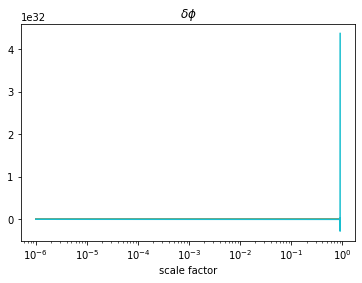

In [5]:
# Calling the 3-fluid mode evolution function
Y, TAU = modes.solve_3fld(A, K, wC, cs2C, wN, cs2N, OmegaB0, OmegaC0,
           OmegaG0, OmegaN0)
Phi = Y[:,0,:].T
deltaG = Y[:,1,:].T
vG = Y[:,2,:].T
deltaC = Y[:,3,:].T
vC = Y[:,4,:].T
deltaN = Y[:,5,:].T
vN = Y[:,6,:].T

plt.plot(A[::2],Phi[::50].T)
plt.xlabel('scale factor')
plt.title('$\delta \phi$')
plt.semilogx()
plt.show()

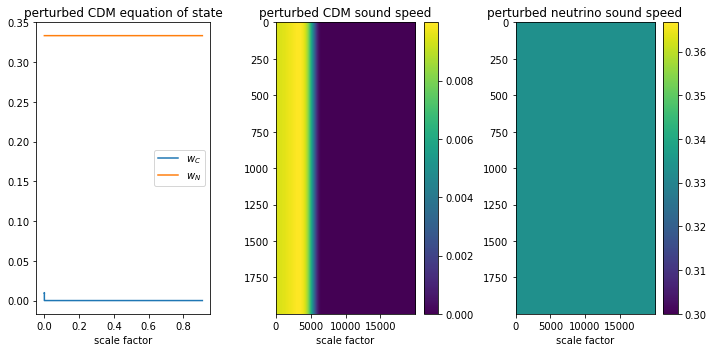

(2000, 10000)


In [6]:
""" Calling the 3-fluid mode evolution function with w-kicks for w_C and w_N"""

def bump(A, a_center, width):
    # returns a gaussian bump defined on the given array A
    return np.exp(-.5*((A-a_center)/(.5*width))**2)

# here you can perturb wC, wN, or both
delta_wC = .01*bump(A, a_rec/100, a_rec/20)
wC_per = np.zeros(2*NT)*1/3 + delta_wC
wN_per = np.ones(2*NT)*1/3
cs2C_per = np.zeros((2*NT, NK)) + np.broadcast_to(delta_wC, (NK, 2*NT)).T
cs2N_per = np.ones((2*NT, NK))*1/3


# plot the perturbed GDM functions
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.title('perturbed CDM equation of state')
plt.plot(A,wC_per)
plt.plot(A,wN_per)
plt.legend(['$w_C$', '$w_N$'])
plt.xlabel('scale factor')
plt.subplot(1,3,2)

plt.title('perturbed CDM sound speed')
plt.imshow(cs2C_per.T,aspect='auto')
plt.colorbar()
plt.xlabel('scale factor')
plt.tight_layout()

plt.subplot(1,3,3)
plt.title('perturbed neutrino sound speed')
plt.imshow(cs2N_per.T,aspect='auto')
plt.colorbar()
plt.xlabel('scale factor')
plt.tight_layout()
plt.show()

# compute modes again with modified GDM functions
Y_per, TAU = modes.solve_3fld(A, K, wC_per, cs2C_per, wN_per, cs2N_per, OmegaB0, OmegaC0,
           OmegaG0, OmegaN0)
Phi_per = Y_per[:,0,:].T
deltaG_per = Y_per[:,1,:].T
vG_per = Y_per[:,2,:].T
deltaC_per = Y_per[:,3,:].T
vC_per = Y_per[:,4,:].T
deltaN_per = Y_per[:,5,:].T
vN_per = Y_per[:,6,:].T
print(np.shape(Phi_per))

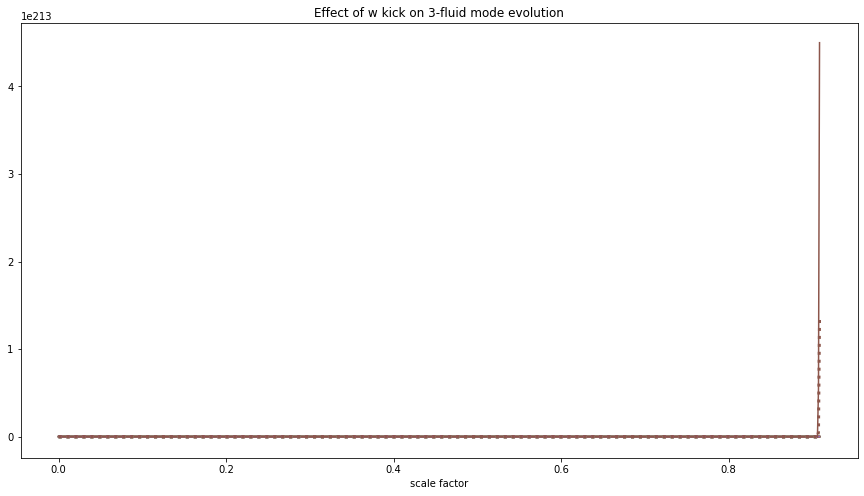

In [7]:
plt.figure(figsize=(15,8))
plt.title('Effect of w kick on 3-fluid mode evolution')

# plot the fiducial 3-fluid mode evolution
plt.plot(A[::2], deltaC[::NK//15].T)

# reset the color cycle so the colors of both lines match up for each mode.
plt.gca().set_prop_cycle(None)

# plot the perturbed 3-fluid mode evolution
plt.plot(A[::2], deltaC_per[::NK//15].T,linestyle=':',linewidth=3)
plt.xlabel('scale factor')
#plt.semilogx()
plt.show()

## 2-fluid modes and w kick

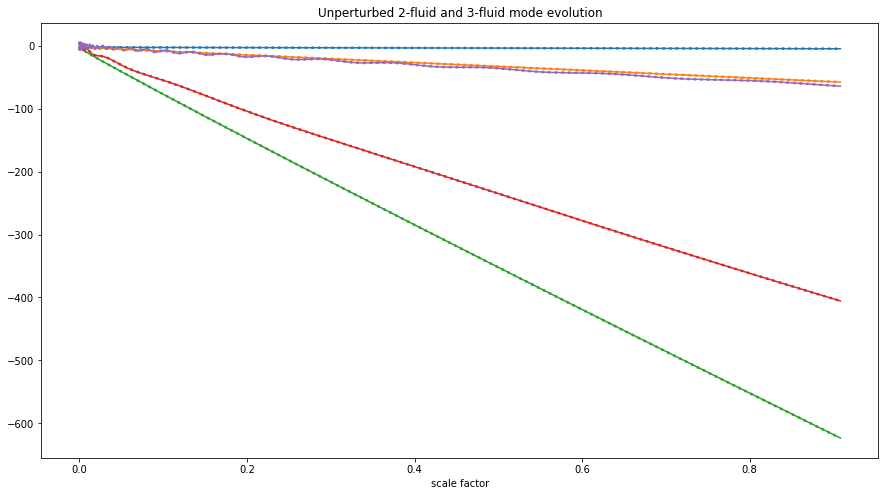

In [8]:
"""Get the fiduciary parameters for the 2-fluid model"""

OmegaB = OmegaB0 * A[::2]**-3
OmegaC = OmegaC0 * A[::2]**-3
OmegaN = OmegaN0 * A[::2]**-4
OmegaG = OmegaG0 * A[::2]**-4
OmegaD = OmegaN + OmegaC

# calculate GDM functions
wD = OmegaN/(3*OmegaD)
deltaD = (OmegaC*deltaC + OmegaN*deltaN)/OmegaD
vD = (OmegaC*vC + 4/3*OmegaN*vN)/((1+wD)*OmegaD)
cs2D = (deltaN*OmegaN/3)/(deltaD*OmegaD)
delta_pD = deltaN

deltaD, vD, cs2D, delta_pD = deltaD.T, vD.T, cs2D.T, delta_pD.T

Y2, TAU2 = modes.solve_2fld(A[::2], K, wD, cs2D, deltaD[0], vD[0], OmegaB0,
               OmegaC0, OmegaG0, OmegaN0, OmegaC0 + OmegaN0)
Phi2 = Y2[:,0,:].T
deltaG2 = Y2[:,1,:].T
vG2 = Y2[:,2,:].T
deltaD2 = Y2[:,3,:].T
vD2 = Y2[:,4,:].T

# compare the 2-fluid mode evolution to 3-fluid
plt.figure(figsize=(15,8))
plt.title('Unperturbed 2-fluid and 3-fluid mode evolution')

# plot the fiducial 3-fluid mode evolution
plt.plot(A[::2], deltaG[::NK//5].T)

# reset the color cycle so the colors of both lines match up for each mode.
plt.gca().set_prop_cycle(None)

# plot the unperturbed 2-fluid mode evolution
plt.plot(A[::4], deltaG2[::NK//5].T,linestyle=':',linewidth=2.5)
plt.xlabel('scale factor')
#plt.semilogx()
plt.show()

In [9]:


a_eq = (OmegaR0/OmegaM0)
H =  A[::2] * np.sqrt(OmegaB + OmegaC + OmegaG+ OmegaN) 
TAU = trapz(A[::2], 1/(A[::2] * H))

k_horizon = (np.pi/4)/TAU
ktau_horizon = .01025 # (one half wavelength inside horizon)
K_h_Mpc = K/(h*4400)
TAU_Gyr = 14*TAU
TAU_Mpc = TAU_Gyr*306.6

TAU_eq = TAU_Mpc[np.argmin(abs(A[::2]-a_eq))]
TAU_rec = TAU_Mpc[np.argmin(abs(A[::2]-a_rec))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


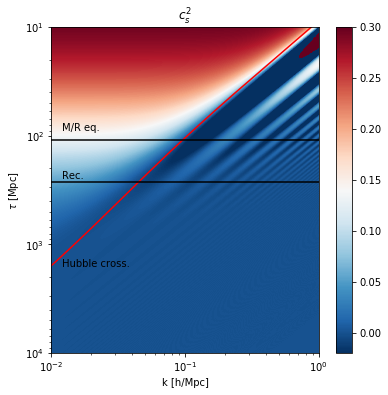

In [10]:
"""Plotting the sound speed heatmap"""
TAU_Mpc[0] = TAU_Mpc[1]
fig, ax = plt.subplots(figsize=(6,6))
color_map = plt.cm.get_cmap('RdBu').reversed()
p = ax.pcolormesh(K_h_Mpc,TAU_Mpc,cs2D[:-1,:-1],
                  vmin=-.02, vmax=.3, cmap=color_map)
plt.colorbar(p)
plt.ylim(10, 10**4)
plt.xlim(10**-2, 1)

# add some lines
plt.plot(2*np.pi*H/(h*4400),TAU_Mpc, color='red')
plt.axhline(TAU_eq, color='black')
plt.axhline(TAU_rec, color='black')

# line labels hardcoded in for now
plt.text(.012,TAU_eq-20,'M/R eq.')
plt.text(.012,TAU_rec-20,'Rec.')
plt.text(.012,1600,'Hubble cross.')
#plt.text(.02,TAU_rec,'rec.')

plt.xlabel("k [h/Mpc]")
plt.ylabel(r"$\tau$ [Mpc]")
plt.title("$c_s^2$")

plt.gca().invert_yaxis()
plt.loglog()
#plt.legend(['M/R eq', 'recombination'])
plt.savefig("plots/cs2D.png")
plt.show()

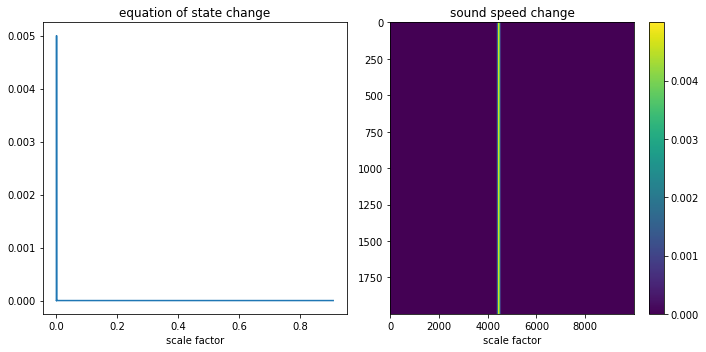

In [10]:
""" Calling the 2-fluid mode evolution function with w-kicks for w_C and w_N"""

def bump(A, a_center, width):
    # returns a gaussian bump defined on the given array A
    return np.exp(-.5*((A-a_center)/(.5*width))**2)

# here you can perturb wD
delta_wD = .005*bump(A[::2], a_rec/2, a_rec/20)
wD_per = wD + delta_wD
cs2D_per = cs2D + np.broadcast_to(delta_wD, (NK, NT)).T


# plot the perturbations to GDM functions
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('equation of state change')
plt.plot(A[::2],wD_per - wD)
plt.xlabel('scale factor')

plt.subplot(1,2,2)
plt.title('sound speed change')
plt.imshow(cs2D_per.T - cs2D.T,aspect='auto')
plt.colorbar()
plt.xlabel('scale factor')
plt.tight_layout()

# compute modes again with modified GDM functions
Y2_per, TAU = modes.solve_2fld(A[::2], K, wD_per, cs2D_per, deltaD[0], vD[0], OmegaB0,
               OmegaC0, OmegaG0, OmegaN0, OmegaC0 + OmegaN0)
Phi2_per = Y2_per[:,0,:].T
deltaG2_per = Y2_per[:,1,:].T
vG2_per = Y2_per[:,2,:].T
deltaD2_per = Y2_per[:,3,:].T
vD2_per = Y2_per[:,4,:].T

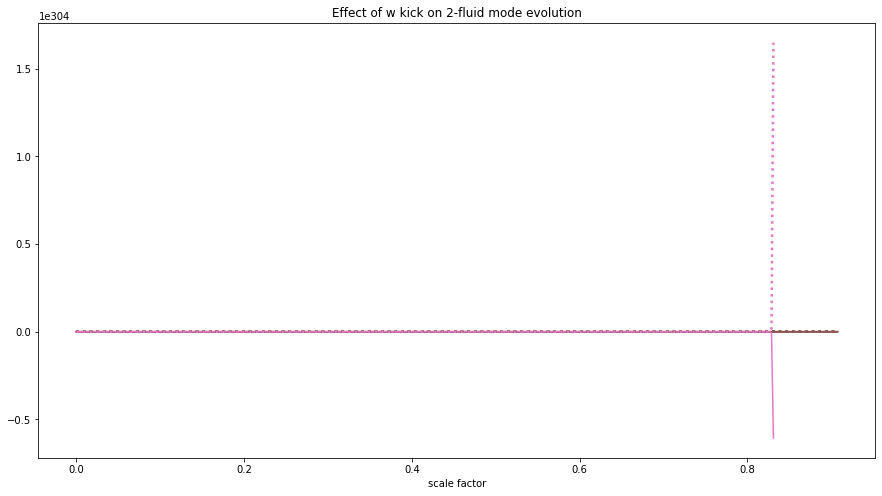

In [11]:
plt.figure(figsize=(15,8))
plt.title('Effect of w kick on 2-fluid mode evolution')

# plot the fiducial 3-fluid mode evolution
plt.plot(A[::4], deltaD2[::NK//6].T)

# reset the color cycle so the colors of both lines match up for each mode.
plt.gca().set_prop_cycle(None)

# plot the perturbed 3-fluid mode evolution
plt.plot(A[::4], deltaD2_per[::NK//6].T,linestyle=':',linewidth=2.5)
plt.xlabel('scale factor')
#plt.semilogx()
plt.show()

## Power Spectrum

In [12]:
# numerical parameters

L_MAX = 2500  # highest l value for power spectrum
L = np.array([i for i in range(2, 50, 1)]+[i for i in range(50, 200, 5)] +
                  [i for i in range(200, L_MAX, 20)])
L_eval = np.arange(2, L_MAX+1) # list of l values where power spectrum is interpolated
NL = len(L)

NX = 10000 # number of points at which to evaluate bessel functions.
xmin = 0.01 # min and max values for x = k*tau
xmax = 3000
X = np.linspace(xmin, xmax, NX)

# physical parameters
As = np.exp(3.064)/1.e10 # scalar perturbation amplitude
TCMB0 = 2.72548 * 1.e6 # CMB temp (microK)


Bessel functions loaded from file.


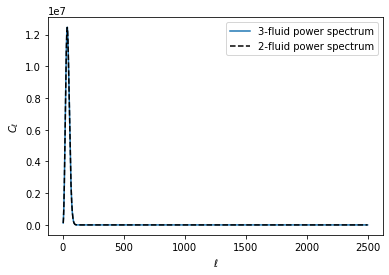

In [13]:
"""Compare power spectra from 3-fluid and 2-fluid"""
# get bessel function and derivative
JLX, DJLX = spectra.get_bessels(L, X)

params_F = [wC, cs2C, wN, cs2N, OmegaB0, OmegaC0, OmegaG0, OmegaN0, As, TCMB0, h]
Cl = spectra.get_Cl_3fld(L, L_eval, X, JLX, DJLX, A, K, *params_F)
Cl2 = spectra.get_Cl_2fld(L, L_eval, X, JLX, DJLX, A[::2], K, wD, cs2D,
                                     deltaD[0], vD[0], OmegaB0, OmegaC0, OmegaG0, OmegaN0,
                                     As, TCMB0, h)
plt.plot(L_eval,Cl)
plt.plot(L_eval,Cl2, linestyle='--',color='black')
plt.legend(['3-fluid power spectrum', '2-fluid power spectrum'])
plt.xlabel('$\ell$')
plt.ylabel('$C_\ell$')
plt.show()

Text(0.5, 1.0, 'w-only Fisher matrix diagonals')

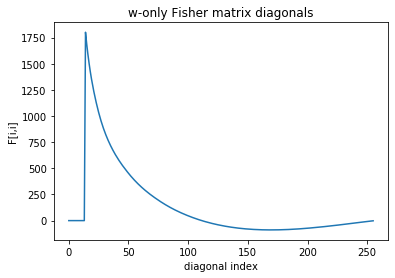

In [14]:
import pickle
x = pickle.load(open("output/w-only/J_q-8_t-7.p", "rb"))
plt.plot(np.diag(x))
plt.xlabel('diagonal index')
plt.ylabel('F[i,i]')
plt.title('w-only Fisher matrix diagonals')